<a href="https://colab.research.google.com/github/twyeh/university-physics/blob/main/Solenoid_Magnetic_Fields.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install magpylib if needed
!pip install magpylib

import magpylib as magpy
import numpy as np
import matplotlib.pyplot as plt

# Solenoid parameters
I = 5            # current in A
radius = 0.1     # solenoid radius in m
length = 0.5     # solenoid length in m
N = 50           # number of windings

# Build solenoid (collection of loops)
sol = magpy.Collection()
zs = np.linspace(-length/2, length/2, N)
for z in zs:
    loop = magpy.current.Circle(
        current=I,
        diameter=2*radius,
        position=(0, 0, z)
    )
    sol.add(loop)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.8/188.8 kB 3.4 MB/s eta 0:00:00


In [2]:
# Create observer grid in x–z plane at y=0
nx, nz = 50, 50
x = np.linspace(-0.2, 0.2, nx)
z = np.linspace(-0.3, 0.3, nz)
X, Z = np.meshgrid(x, z)
grid = np.stack([X, np.zeros_like(X), Z], axis=-1)

# Compute B-field on grid
B = sol.getB(grid)
Bx = B[:, :, 0]
Bz = B[:, :, 2]
Bamp = np.sqrt(Bx**2 + Bz**2)


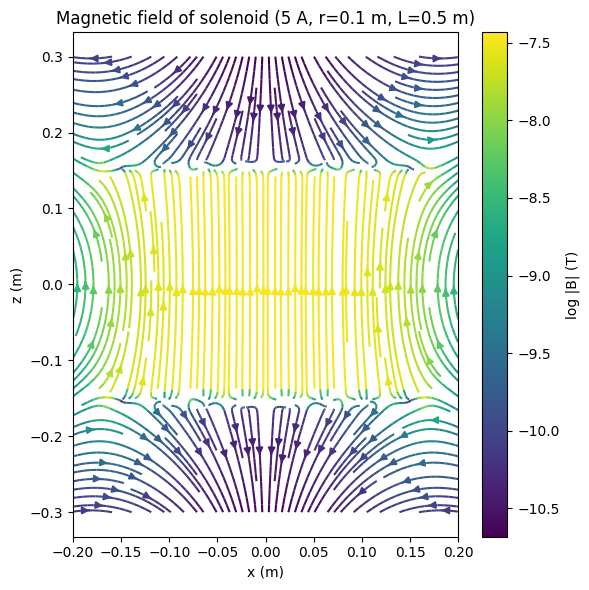

In [3]:
# Plot streamlines of B-field
fig, ax = plt.subplots(figsize=(6,6))
strm = ax.streamplot(
    x, z,
    Bx.T, Bz.T,
    density=2,
    color=np.log(Bamp).T,
    cmap='viridis'
)
ax.set_xlabel('x (m)')
ax.set_ylabel('z (m)')
ax.set_title('Magnetic field of solenoid (5 A, r=0.1 m, L=0.5 m)')
plt.colorbar(strm.lines, ax=ax, label='log |B| (T)')
plt.tight_layout()
plt.show()
